# Multithreading y Multiprocessing 

En este Notebook se mostrará la diferencia en tiempos de ejecución entre un programa escrito con la librería `multithreading` y la `multiprocessing`.

Para llevar a cabo este estudio se usará como aplicación ejemplo [El juego de la vida de Conway](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life).

## Conociendo el entorno

Inicialmente vamos a conocer cuantos núcleos nos ofrecen en este entorno de Notebook en Google Colab.

In [1]:
#
# Tomado de: https://superfastpython.com/number-of-cpus-python/#CPU_Count_with_multiprocessingcpu_count
#
from multiprocessing import cpu_count

n_cores = cpu_count()

print(f'Numero de CPUs lógicas: {n_cores}')

Numero de CPUs lógicas: 12


## Código del juego de la vida de Conway

En esta sección se verán algunas implementaciones del algoritmo del juego de la vida de Conway. 
Inicialmente se verá una versión secuencial, luego se introducirán los elementos para que esta versión secuencial se ejecute con el módulo de `multithreading` y luego `multiprocessing`.

### Versión secuencial


El tiempo que tomó calcular 0.01613616943359375


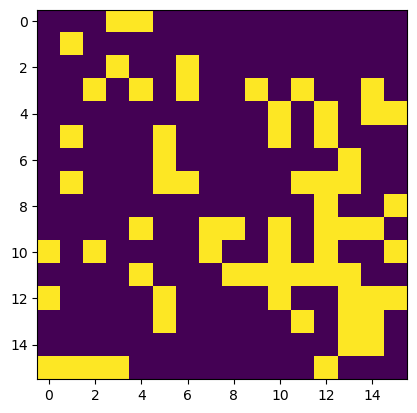

In [57]:
# Version SECUENCIAL del juego de la vida de Conway
#
# Autor: John Sanabria - john.sanabria@correounivalle.edu.co
# Fecha: 2023-02-22

import numpy as np
from time import time

import matplotlib.pyplot as plt 

#
# Funciones auxiliares usadas para estimar los vecinos de una celda y
# garantizar que los valores del borde no se vayan a sobrepasar
#
def posx(x, max_x = MAX_X):
  return (x + max_x) % max_x

def posy(y, max_y = MAX_Y):
  return (y + max_y) % max_y

def indice(x,y, max_y = MAX_Y):
  return posx(x) * max_y + posy(y) 

#
# Esta funcion se encarga de contar los 8 vecinos de una celda cuales están
# vivos (valor a '1') o cuantos están muertos (valor a '0')
#
#                 |                |
#  (X - 1, Y - 1) | (  X  , Y - 1) | (X + 1, Y - 1)
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1,   Y  ) | (  X  ,   Y  ) | (X + 1,   Y  )
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1, Y + 1) | (  X  , Y + 1) | (X + 1, Y + 1)
#                 |                |

def vecinos(x,y,vector):
  return vector[ indice(x - 1, y - 1) ] + vector[ indice(x - 1, y) ] + vector[ indice(x - 1, y + 1) ] \
  + vector[ indice(x, y - 1) ] + vector[ indice(x, y + 1) ] \
  + vector[ indice(x + 1, y - 1) ] + vector[ indice(x + 1, y) ] + vector[ indice(x + 1, y + 1) ]
#
# Esta función se encarga de recorrer toda las celdas y estimar cuales de ellas 
# vivirán y cuales no 
#
def conway(vector_out, vector_in, low_limit = 0, high_limit = MAX_X):
  for i in range(low_limit,high_limit):
    for j in range(0,MAX_Y):
      n = vecinos(i,j, vector_in)
      valor = 0
      if vector_in[ indice(i,j) ] == 1 and (n == 2 or n == 3):
        if (i == 8 and j == 1):
            print("Entre")
        valor = 1
      elif vector_in[ indice(i,j) ] == 0 and n == 3:
        valor = 1
      vector_out[ indice(i,j) ] = valor

#
# Función principal
#
if __name__ == '__main__':
  vector = np.int32( np.random.choice([1,0], MAX_X * MAX_Y, p = [0.50, 0.50]) )
  vector_out = np.empty(MAX_X * MAX_Y, dtype = np.int32)
  t1 = time()
  conway(vector_out, vector)
  t2 = time()
  print(f"El tiempo que tomó calcular {t2 - t1}")
  fig = plt.figure()
  plt.imshow(vector_out.reshape(MAX_X,MAX_Y))
  plt.show()  

### Versión multithreading

[0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0
 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1]
[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1
 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0

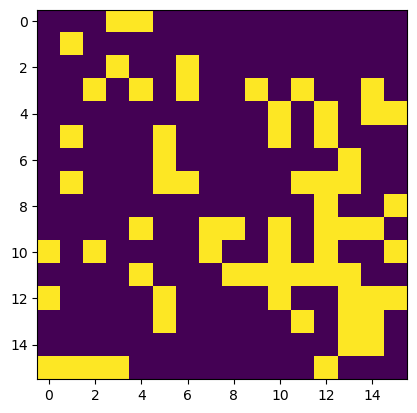

In [56]:
# Version MULTITHREADING del juego de la vida de Conway
#
# Autor: John Sanabria - john.sanabria@correounivalle.edu.co
# Fecha: 2023-02-22

import numpy as np
from threading import Thread
from multiprocessing import cpu_count
from time import time

import matplotlib.pyplot as plt 

MAX_UNITS = cpu_count()

#
# Funciones auxiliares usadas para estimar los vecinos de una celda y
# garantizar que los valores del borde no se vayan a sobrepasar
#

def posx(x, max_x = MAX_X):
  return (x + max_x) % max_x

def posy(y, max_y = MAX_Y):
  return (y + max_y) % max_y

def indice(x,y, max_y = MAX_Y):
  return posx(x) * max_y + posy(y)

#
# Esta funcion se encarga de contar los 8 vecinos de una celda cuales están
# vivos (valor a '1') o cuantos están muertos (valor a '0')
#
#                 |                |
#  (X - 1, Y - 1) | (  X  , Y - 1) | (X + 1, Y - 1)
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1,   Y  ) | (  X  ,   Y  ) | (X + 1,   Y  )
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1, Y + 1) | (  X  , Y + 1) | (X + 1, Y + 1)
#

def vecinos(x,y,vector):
  return vector[ indice(x - 1, y - 1) ] + vector[ indice(x - 1, y) ] + vector[ indice(x - 1, y + 1) ] \
  + vector[ indice(x, y - 1) ] + vector[ indice(x, y + 1) ] \
  + vector[ indice(x + 1, y - 1) ] + vector[ indice(x + 1, y) ] + vector[ indice(x + 1, y + 1) ]
#
# Esta función se encarga de recorrer toda las celdas y estimar cuales de ellas 
# vivirán y cuales no 
#
def conway(vector_out, vector_in, low_limit = 0, high_limit = MAX_X):
  for i in range(low_limit,high_limit):
    for j in range(0,MAX_Y):
      n = vecinos(i,j, vector_in)
      valor = 0
      if vector_in[ indice(i,j) ] == 1 and (n == 2 or n == 3):
        valor = 1
      elif vector_in[ indice(i,j) ] == 0 and n == 3:
        valor = 1
      vector_out[ indice(i,j) ] = valor

#
# Función principal
#
if __name__ == '__main__':
  vector = np.int32( np.random.choice([1,0], MAX_X * MAX_Y, p = [0.50, 0.50]) )
  vector_out = np.empty(MAX_X * MAX_Y, dtype = np.int32)
  print(vector)
  # Variables usadas para hacer la partición de las filas que procesara cada
  # hilo
  stride = np.int32(MAX_X / MAX_UNITS) 
  count = np.int32(0)
  workers = [] # arreglo que almacenará aquellos hilos que se ejecutan
  for t in range(MAX_UNITS):
    worker = Thread(target = conway,
                    args = (vector_out, vector, count, count + stride))
    worker.daemon = True
    workers.append(worker)
    count = count + stride

  t1 = time()
  for worker in workers:
    worker.start()
  # Ciclo que espera por la terminación de todos los hilos que se lanzaron
  for worker in workers:
    worker.join()
  t2 = time()
  print(vector_out)
  print(f"El tiempo que tomó calcular {t2 - t1}")
  fig = plt.figure()
  plt.imshow(vector_out.reshape(MAX_X,MAX_Y))
  plt.show()  

### Versión multiprocessing

[[0 1 1 ... 0 0 0]
 [0 1 0 ... 0 1 1]
 [1 0 1 ... 1 0 1]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]]

[[          1           1           0 ...           1           0
            0]
 [          0           0           0 ...           0           1
            1]
 [          0           0           1 ...           0           0
            0]
 ...
 [-1292852560       32619 -1292852528 ...       32619 -1292836144
        32619]
 [-1292836112       32619 -1292836080 ...       32619 -1292819696
        32619]
 [-1292819664       32619 -1292819632 ...       32619 -1292803248
        32619]]
El tiempo que tomó calcular 0.46303749084472656
La posicion (3,3) paso de 0 a 0
Sus vecinos eran
1, 0, 0
0, X, 0
1, 0, 0


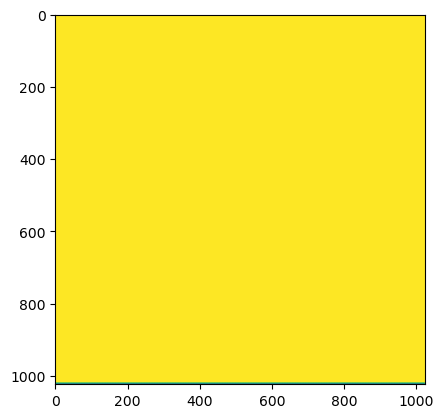

In [24]:
# Version MULTIPROCESSING del juego de la vida de Conway
#
# Autor: John Sanabria - john.sanabria@correounivalle.edu.co
# Fecha: 2023-02-22

import numpy as np
from multiprocessing import Process
from multiprocessing import cpu_count
from multiprocessing import RawArray
from time import time

import matplotlib.pyplot as plt 

MAX_UNITS = cpu_count()
MAX_X = 1024
MAX_Y = 1024

_vector = np.int32( np.random.choice([1,0], MAX_X * MAX_Y, p = [0.50, 0.50]) )
vector = RawArray('i',_vector)
_vector_out = np.empty(MAX_X * MAX_Y, dtype = np.int32)
vector_out = RawArray('i',_vector_out)

#
# Funciones auxiliares usadas para estimar los vecinos de una celda y
# garantizar que los valores del borde no se vayan a sobrepasar
#

def posx(x, max_x = MAX_X):
  return (x + max_x) % max_x

def posy(y, max_y = MAX_Y):
  return (y + max_y) % max_y

def indice(x,y, max_y = MAX_Y):
  return posx(x) * max_y + posy(y)

#
# Esta funcion se encarga de contar los 8 vecinos de una celda cuales están
# vivos (valor a '1') o cuantos están muertos (valor a '0')
#
#                 |                |
#  (X - 1, Y - 1) | (  X  , Y - 1) | (X + 1, Y - 1)
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1,   Y  ) | (  X  ,   Y  ) | (X + 1,   Y  )
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1, Y + 1) | (  X  , Y + 1) | (X + 1, Y + 1)
#

def vecinos(x,y):
  return vector[ indice(x - 1, y - 1) ] + vector[ indice(x - 1 , y) ] + vector[ indice(x - 1, y + 1) ] \
  + vector[ indice(x, y - 1) ] + vector[ indice(x, y + 1) ] \
  + vector[ indice(x + 1, y - 1) ] + vector[ indice(x + 1 , y) ] + vector[ indice(x + 1, y + 1) ]

def imprimir_vecinos(x,y):
    print(f"La posicion ({x},{y}) paso de {vector[indice(x,y)]} a {vector_out[indice(x,y)]}")
    print("Sus vecinos eran")
    print(f"{vector[ indice(x - 1, y - 1) ]}, {vector[ indice(x - 1, y) ]}, {vector[ indice(x - 1, y + 1)]}")
    print(f"{vector[ indice(x, y - 1) ]}, X, {vector[ indice(x, y + 1) ]}")
    print(f"{vector[ indice(x + 1, y - 1) ]}, {vector[ indice(x + 1, y) ]}, {vector[ indice(x + 1, y + 1) ]}")

#
# Esta función se encarga de recorrer toda las celdas y estimar cuales de ellas 
# vivirán y cuales no 
#
def conway(low_limit = 0, high_limit = MAX_X):
  #print(f"De fila {low_limit} a fila {high_limit}")
  for i in range(low_limit,high_limit):
    for j in range(0,MAX_Y):
      n = vecinos(i,j)
      valor = 0
      if vector[ indice(i,j) ] == 1 and (n == 2 or n == 3):
        valor = 1
      elif vector[ indice(i,j) ] == 0 and n == 3:
        valor = 1
      vector_out[ indice(i,j) ] = valor

#
# Función principal
#
if __name__ == '__main__':
  #print(np.frombuffer(vector, dtype = np.int32))
  print(np.frombuffer(vector, dtype = np.int32).reshape(MAX_X, MAX_Y))
  # Variables usadas para hacer la partición de las filas que trabajará cada
  # proceso
  stride = np.int32(MAX_X / MAX_UNITS)
  count = np.int32(0)
  workers = [] # arreglo que almacenará aquellos procesos que se crearán
  for t in range(MAX_UNITS):
    worker = Process(target = conway,
                    args = (count, np.int32(count + stride)))
    workers.append(worker)
    #print(count)
    count = count + stride
  # Ciclo que lanza la ejecución de los procesos que se crearon
  t1 = time()
  for worker in workers:
    worker.start()
  # Ciclo que espera por la terminación de todos los procesos que se lanzaron
  for worker in workers:
    worker.join()
  t2 = time()
  print()
  print(np.frombuffer(vector_out, dtype = np.int32).reshape(MAX_X, MAX_Y))
  print(f"El tiempo que tomó calcular {t2 - t1}")
  imprimir_vecinos(3,3)
  fig = plt.figure()
  plt.imshow(np.frombuffer(vector_out, dtype=np.int32).reshape(MAX_X,MAX_Y))
  plt.show() 

00.........10.........20.........30.........40.........50.........60.........70.........80.........90.........100.........110.........120.........130.........140.........150.........160.........170.........180.........190.........200.........210.........220.........230.........240.........

0

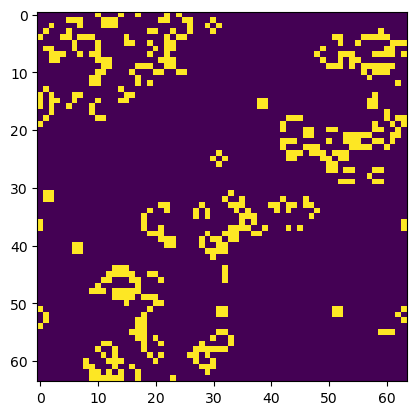

In [1]:
# Version MULTIPROCESSING del juego de la vida de Conway con ANIMACIÓN
#
# Autor: John Sanabria - john.sanabria@correounivalle.edu.co
# Fecha: 2023-02-22

import numpy as np
from multiprocessing import Process
from multiprocessing import cpu_count
from multiprocessing import RawArray
from time import time

import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

MAX_UNITS = cpu_count() # número de trabajadores disponibles
MAX_X = 64 # dimensión en X de la grilla
MAX_Y = 64 # dimensión en Y de la grilla
stride = np.int32(MAX_X / MAX_UNITS)
PRINT_X_EACH = 10 # Cada cuanto imprimir una 'X' para mostrar el progreso

_vector = np.int32( np.random.choice([1,0], MAX_X * MAX_Y, p = [0.50, 0.50]) ) # Vector inicial NumPy
vector = RawArray('i',_vector) # Vector inicial pero compartible en el contexto de Multiprocessing
_vector_out = np.empty(MAX_X * MAX_Y, dtype = np.int32) # Vector después de una iteración
vector_out = RawArray('i',_vector_out) # Vector después de una iteración compartible en Multiprocessing

#
# Preparar variables para la visualización de los datos
#
fig, ax = plt.subplots()
image = ax.imshow(np.frombuffer(vector,dtype=np.int32).reshape(MAX_X,MAX_Y))

#
# Funciones auxiliares usadas para estimar los vecinos de una celda y
# garantizar que los valores del borde no se vayan a sobrepasar
#

def posx(x, max_x = MAX_X):
  return (x + max_x) % max_x

def posy(y, max_y = MAX_Y):
  return (y + max_y) % max_y

def indice(x,y, max_y = MAX_Y):
  return posx(x) * max_y + posy(y)

#
# Esta funcion se encarga de contar los 8 vecinos de una celda cuales están
# vivos (valor a '1') o cuantos están muertos (valor a '0')
#
#                 |                |
#  (X - 1, Y - 1) | (  X  , Y - 1) | (X + 1, Y - 1)
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1,   Y  ) | (  X  ,   Y  ) | (X + 1,   Y  )
#                 |                |
# --------------------------------------------------
#                 |                |
#  (X - 1, Y + 1) | (  X  , Y + 1) | (X + 1, Y + 1)
#

def vecinos(x,y):
  return vector[ indice(x - 1, y - 1) ] + vector[ indice(x - 1 , y) ] + vector[ indice(x - 1, y + 1) ] \
  + vector[ indice(x, y - 1) ] + vector[ indice(x, y + 1) ] \
  + vector[ indice(x + 1, y - 1) ] + vector[ indice(x + 1 , y) ] + vector[ indice(x + 1, y + 1) ]

def imprimir_vecinos(x,y):
    print(f"La posicion ({x},{y}) paso de {vector[indice(x,y)]} a {vector_out[indice(x,y)]}")
    print("Sus vecinos eran")
    print(f"{vector[ indice(x - 1, y - 1) ]}, {vector[ indice(x - 1, y) ]}, {vector[ indice(x - 1, y + 1)]}")
    print(f"{vector[ indice(x, y - 1) ]}, X, {vector[ indice(x, y + 1) ]}")
    print(f"{vector[ indice(x + 1, y - 1) ]}, {vector[ indice(x + 1, y) ]}, {vector[ indice(x + 1, y + 1) ]}")

#
# Esta función se encarga de recorrer toda las celdas y estimar cuales de ellas 
# vivirán y cuales no 
#
def conway(low_limit = 0, high_limit = MAX_X):
  for i in range(low_limit,high_limit):
    for j in range(0,MAX_Y):
      n = vecinos(i,j)
      valor = 0
      if vector[ indice(i,j) ] == 1 and (n == 2 or n == 3):
        valor = 1
      elif vector[ indice(i,j) ] == 0 and n == 3:
        valor = 1
      vector_out[ indice(i,j) ] = valor

# 
# Esta función es la que se encarga de llevar a cabo la aplicación de la 
# función de Conway en paralelo sobre los elementos de la grilla. Usando la 
# librería Multiprocessing se lleva a cabo el procesamiento paralelo
#
def nueva_generacion(i):
  count = np.int32(0)
  workers = [] # arreglo que almacenará aquellos procesos que se crearán
  # Creación de los procesos
  for t in range(MAX_UNITS):
    worker = Process(target = conway,
                    args = (count, np.int32(count + stride)))
    workers.append(worker)
    count = count + stride
  # Ciclo que lanza la ejecución de los procesos que se crearon
  for worker in workers:
    worker.start()
  # Ciclo que espera por la terminación de todos los procesos que se lanzaron
  for worker in workers:
    worker.join()
  if i % PRINT_X_EACH == 0:
    print(f"{i}",end="")
  else:
    print(".",end="")

    
def actualizar_imagen(i):
    nueva_generacion(i)
    vector[:] = vector_out[:]
    image.set_data(np.frombuffer(vector,dtype=np.int32).reshape(MAX_X,MAX_Y))

#
# Función principal
#
if __name__ == '__main__':
  anim = FuncAnimation(fig, actualizar_imagen, frames=250, interval=100)
  html = HTML(anim.to_jshtml())
  display(html)